In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('amazon.csv', encoding = "iso 8859-1", parse_dates = ['date'])

In [22]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

# 1 .Displaying top 5 rows of the dataset

In [23]:
data.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# 2.Displaying bottom 5 wors of the dataset

In [24]:
data.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# 3.Find Shape of Our Dataset(Number of Rows and number of columns)

In [25]:
data.shape

(6454, 5)

In [27]:
print("Number of Rows is: ", data.shape[0])
print("Number of Columns is: ", data.shape[1])


Number of Rows is:  6454
Number of Columns is:  5


# 4. Getting Information About our dataset like total number rows, total number of columns, datatypes of each column and memory Requirement

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


# 5. Check for duplicate data and drop them

In [32]:
duplicated_data = data.duplicated().any()  # Checking if there is any duplicated data
print(duplicated_data) 

True


In [33]:
data = data.drop_duplicates()

In [35]:
data.shape

(6422, 5)

# 6.Check Null Values In the dataset

In [38]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

# 7. Get Overall Statistics About the dataframe

In [42]:
data.describe(include = 'all', datetime_is_numeric = True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


# 8.Total Number of Fires Registered


In [59]:
data.shape

(6422, 6)

# 9.In Which Month Maximum Number of Forest Fires Were Reported?

In [60]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [64]:
data1 = data.groupby('month')['number'].sum().reset_index()

In [65]:
data1

,month,number
0,Abril,28184.770
1,Agosto,88050.435
2,Dezembro,57535.480
3,Fevereiro,30839.050
4,Janeiro,47681.844
5,Julho,92319.113
6,Junho,55997.675
7,Maio,34725.363
8,Março,30709.405
9,Novembro,85508.054


<Axes: xlabel='month', ylabel='number'>

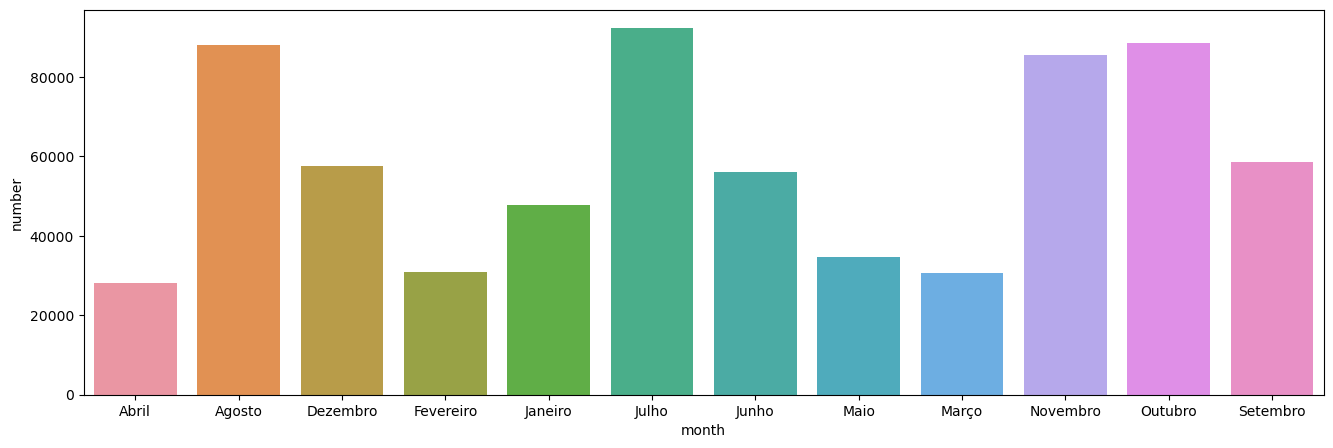

In [69]:
plt.figure(figsize=(16,5))
sns.barplot(x="month", y = "number", data = data1)

# 10. In Which Year Maximum Number of Forest Fires Was Reported?

In [70]:
data2 = data.groupby('year')['number'].sum().reset_index()

In [71]:
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

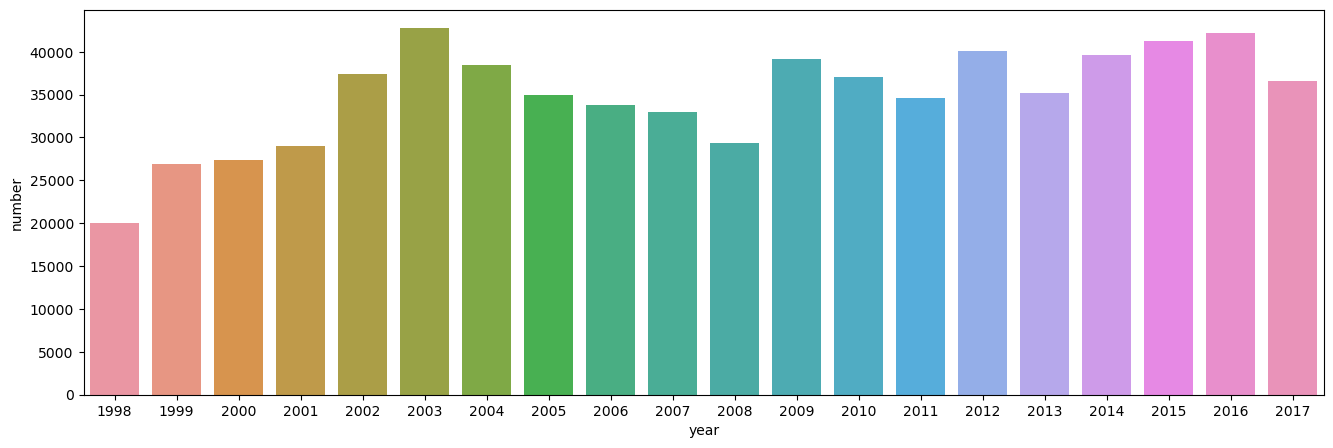

In [73]:
plt.figure(figsize=(16,5))
sns.barplot(x = "year", y = "number", data = data2)

# 11. In Which State Maximum Number of Forest Fires Was Reported?

In [74]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [78]:
data3 = data.groupby('state')['number'].sum().reset_index()

In [79]:
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<Axes: xlabel='state', ylabel='number'>

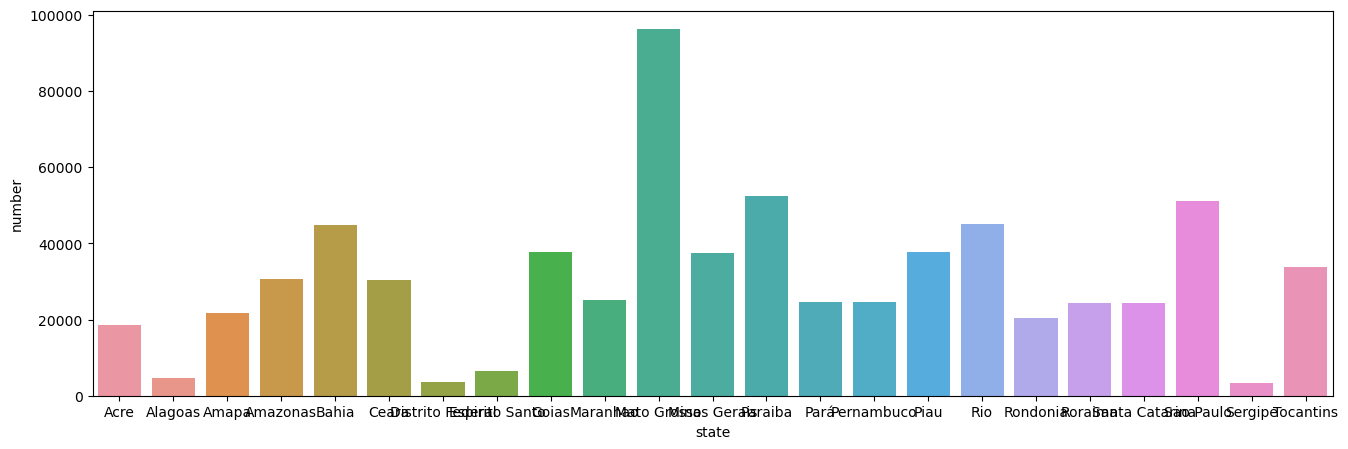

In [82]:
plt.figure(figsize =(16,5))
sns.barplot(x = "state", y = "number", data = data3)


# 12. Find Total Number of Fires Were Reported In Amazonas

In [83]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [87]:
data[data['state'] == "Amazonas"]['number'].sum()

30650.129

# 13. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [88]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [95]:
data4 = data[data['state'] == "Amazonas"]
data5 = data4.groupby('year')['number'].sum()

In [96]:
data5

year
1998     946.000
1999    1061.000
2000     853.000
2001    1297.000
2002    2852.000
2003    1524.268
2004    2298.207
2005    1657.128
2006     997.640
2007     589.601
2008    2717.000
2009    1320.601
2010    2324.508
2011    1652.538
2012    1110.641
2013     905.217
2014    2385.909
2015    1189.994
2016    2060.972
2017     906.905
Name: number, dtype: float64

# 14. Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [102]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [103]:
data6 = data[data['state'] == "Amazons"]

In [109]:
result = data6.groupby(data6['date'].dt.dayofweek)['number'].sum()

import calendar

In [110]:
result

Series([], Name: number, dtype: float64)

# 15. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [111]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [116]:
fire = data[data['year'] == 2015].groupby('month')['number'].sum().reset_index()

In [117]:
fire

,month,number
0,Abril,2573.000
1,Agosto,4363.125
2,Dezembro,4088.522
3,Fevereiro,2309.000
4,Janeiro,4635.000
5,Julho,4364.392
6,Junho,3260.552
7,Maio,2384.000
8,Março,2202.000
9,Novembro,4034.518


<Axes: xlabel='month', ylabel='number'>

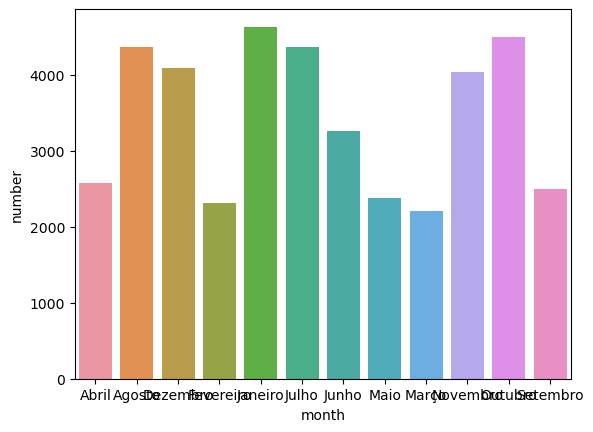

In [118]:
sns.barplot(x = "month", y = "number", data=fire)

# 16. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [119]:
data.columns


Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [124]:
data7 = data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [125]:
data7

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


<Axes: xlabel='state', ylabel='number'>

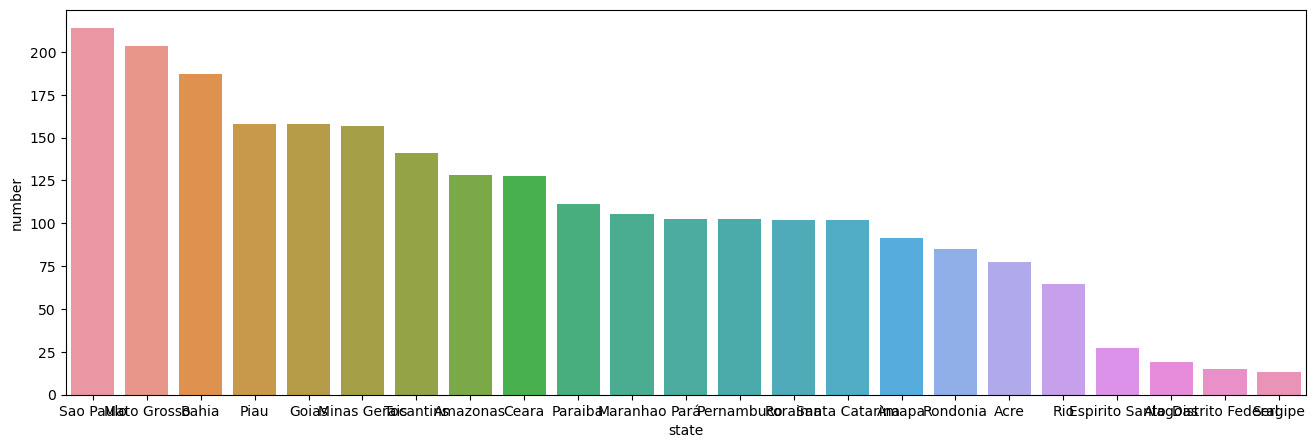

In [127]:
plt.figure(figsize=(16,5))
sns.barplot(x="state", y="number", data=data7)

# 17. To Find The State Names Where Fires Were Reported In 'dec' Month

In [128]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [134]:
data[data['month'] == 'Dezembro']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)